# University of Idaho - Climate Impacts Research Consortium (CIRC)
## Data Mining Stream: Agricultural Resilience Data Modeling
## Commodity Model: WHEAT
### Erich Seamon, UPDATED: July 24, 2016
### erichs@uidaho.edu
### http://dmine.io
### http://erich.io

<H2>DMINE Ag Resilience - Part 4: Data Modeling - Commodity Model: WHEAT </H2>

**The Climate Impacts Research Consortium (CIRC)** data mining stream has developed a set of data mining and machine learning processes, in order to provide a basic example of how we might approach climatic impact prediction over space and time.

Our example in this instance is to explore how we might predict economic crop loss over space and time, using data that is extracted from differing sources, transformed, and combined with a response variable that is a approximation of economic crop loss, in dollars. This notebook provides an overview of our steps for this example, which include:


**1. Demo Overview. ** An overview of the problem, summary of the datasets involved.
   <br> </br> <br></br>
**2. Data transformation.**  What steps do we need to take to transform and combine data into a form that is ready to machine learning techniques?
    <br></br><br></br>
**3. Exploratory Data Analysis.**  After transforming the data, a matrix of all values is generated.  From this dataset, what EDA can we perform that will help us to better understand our hypothesis/es?
    <br></br><br></br>
**4. Machine learning model generation, optimization.**  Which model works best?
   <br></br><br></br>
**5. Model Instantiation. ** Apply most optimized model to a python API for enabling prediction requests.


## 1. Demo Overview: Overview of the problem, and summary of datasets

### Food Resilience NOAA key points (adapted from Third National Climate Assessment - Hatfield, et al, 2014)


 - Climate disruptions to agricultural production have increased over the past 40 years and are projected to increase over the next 25 years. Farmers and ranchers will likely need to increase their rate of innovation and adaptation to keep pace with this projected change.
 
 - Crop and livestock production in many agricultural regions will likely decline due to weeds, diseases, insects, and climate-related stresses.
 
 - The rising incidence of extreme weather—including heat waves, drought, and very heavy precipitation—will increasingly impact crop and livestock productivity.
 
 - Climate-related changes in crop yields and food prices as well as impacts on food processing, storage, and distribution systems can impact food security.
 
 
 ### Problem question: Can we perform data mining techniques to assemble food resilience data - and construct a machine learning model that predicts economic crop loss?
 
 

## Datasets and data sources used as part of the analysis

To be straightforward for the sake of demonstration - we are using two core datasets:
    
- **University of Idaho GRIDMET data.**  Since our CIRC project uses UIdaho GRIDMET/MACA data for a portion of our research efforts, i thought using this as an input dataset might be appropriate.  As a note, we can easily add variables to this grouping that might be from other sources.
- **USDA Economic Crop Loss data.**  The USDA's Risk Management Agency summarizes economic crop loss insurance claims at a county and monthly level, going back to 1980.  This dataset gives a historical view of crop loss, and to a more generalized degree, overall economic food security.  

Transforming both datasets to be spatially and geographically normalized (at the county/monthly/commodity level), we can then integrate into one big matrix.

## 2. Data Transformation

Data transformation was done in R.  The following R script was used to 

In [4]:
import PIL
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import os,sys
import numpy as np
from PIL import Image
from urllib2 import urlopen
import os,sys
from PIL import Image


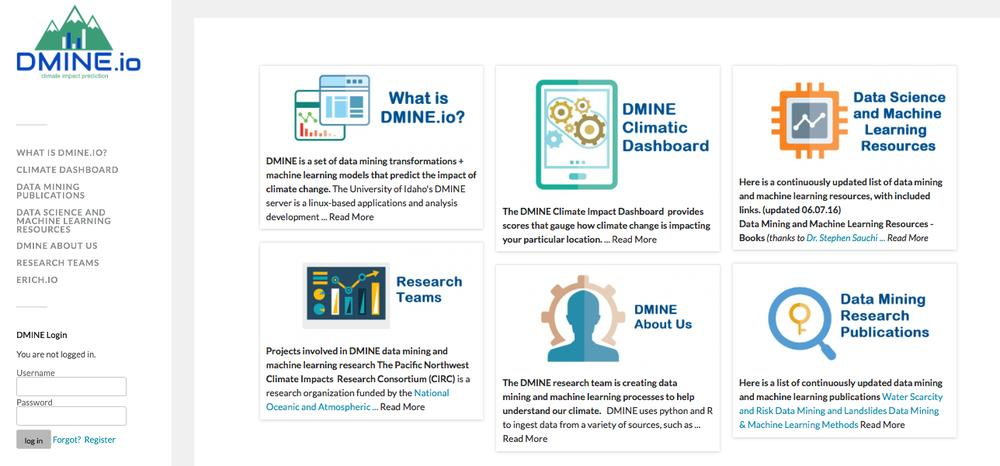

In [5]:
basewidth = 1000
img = Image.open(urlopen("http://dmine.io/wp-content/uploads/2016/06/Screen-Shot-2016-06-10-at-7.35.10-PM.png"))
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
os.chdir("/nethome/erichs/")
img.save("dmine-website-2016.jpg")
jpgfile = Image.open("dmine-website-2016.jpg")
jpgfile

# Machine Learning Demonstration - CIRC DMINE AG



## Loading libraries and importing data.  

This dataset is a ~14000 record dataset of monthly crop loss and acreage values, that has been integrated with GRIDMET daily data - summarized to monthly, and at a county geographic scale - for only Washington.

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
os.chdir("/reacchspace/dmine/agmesh-scenarios/scenario_52177/summaries/")
train = pd.read_csv('2001_2015_usda_gridmet_WA')
%matplotlib nbagg

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [7]:
train.columns.unique

<bound method Index.unique of Index([u'year', u'month', u'countyfips', u'bi', u'pr', u'th', u'pdsi', u'pet',
       u'erc', u'rmin', u'rmax', u'tmmn', u'tmmx', u'srad', u'sph', u'vs',
       u'fm1000', u'fm100', u'statecode', u'state', u'countycode', u'county',
       u'commoditycode', u'commodity', u'insuranceplancode', u'insurancename',
       u'stagecode', u'damagecausecode', u'damagecause', u'monthcode',
       u'acres', u'loss'],
      dtype='object')>

In [8]:
train


,year,month,countyfips,bi,pr,th,pdsi,pet,erc,rmin,...,commoditycode,commodity,insuranceplancode,insurancename,stagecode,damagecausecode,damagecause,monthcode,acres,loss
0,2001,APR,53001,18.561680,1.012276,188.6618,-0.921773,3.066433,27.887755,34.75576,...,54,APPLES,86,APH,UH,41,Frost,4,48.3000,110761.00
1,2001,APR,53001,18.561680,1.012276,188.6618,-0.921773,3.066433,27.887755,34.75576,...,54,APPLES,86,APH,H,41,Frost,4,83.0000,83266.00
2,2001,APR,53001,18.561680,1.012276,188.6618,-0.921773,3.066433,27.887755,34.75576,...,11,WHEAT,90,APH,H,41,Frost,4,66.9000,2203.20
3,2001,APR,53001,18.561680,1.012276,188.6618,-0.921773,3.066433,27.887755,34.75576,...,11,WHEAT,44,CRC,H,44,Cold Wet Weather,4,4.8360,397.20
4,2001,APR,53001,18.561680,1.012276,188.6618,-0.921773,3.066433,27.887755,34.75576,...,91,BARLEY,90,APH,H,41,Frost,4,12.2900,261.00
5,2001,APR,53001,18.561680,1.012276,188.6618,-0.921773,3.066433,27.887755,34.75576,...,11,WHEAT,44,CRC,H,41,Frost,4,480.6310,34222.05
6,2001,APR,53003,12.639703,2.166589,237.2770,-0.699271,2.617945,20.632084,45.65892,...,91,BARLEY,90,APH,UH,11,Drought,4,106.6000,3324.00
7,2001,APR,53003,12.639703,2.166589,237.2770,-0.699271,2.617945,20.632084,45.65892,...,11,WHEAT,90,APH,H,43,Cold Winter,4,27.9450,417.00
8,2001,APR,53005,19.908669,0.931282,189.1380,-0.719470,3.313761,29.699670,33.62829,...,39,SUGAR BEETS,90,APH,R,42,Freeze,4,945.0000,1098.00
9,2001,APR,53005,19.908669,0.931282,189.1380,-0.719470,3.313761,29.699670,33.62829,...,57,CHERRIES,51,DOL,H,81,Plant Disease,4,7.1000,8619.00


In [9]:
# create column vectors
# all columns
all_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'loss']

# only feature columns
feature_cols1 = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'acres', 'loss']

feature_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres']

matrix_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'loss']
matrix_withlog_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'loss', 'logloss']

matrix_less_cols = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax']
all_minus_cols = ['countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode']

#--------

# Creating X for machine learning for joining with dummy fields

X = train[feature_cols]
Xpre = stats.zscore(X)
Xpre = pd.DataFrame(X)
X1 = train[all_minus_cols]
X1 = pd.DataFrame(X1)
X = pd.concat([Xpre, X1], axis=1)

# create dummy code columns

monthcode_dummies = pd.get_dummies(X['monthcode'])
damagecause_dummies = pd.get_dummies(X['damagecausecode'])
insuranceplancode_dummies = pd.get_dummies(X['insuranceplancode'])
#commodity_dummies = pd.get_dummies(X['commoditycode'])
stagecode_dummies = pd.get_dummies(X['stagecode'])
#countyfips_dummies = pd.get_dummies(X['countyfips'])
#year_dummies = pd.get_dummies(X['year'])


In [10]:
#-generate zscores for all the x climate data variables.  Adds a '_zscore' to the end of the column name

for col in Xpre:
    col_zscore = col + '_zscore'
    Xpre[col_zscore] = (Xpre[col] - Xpre[col].mean())/Xpre[col].std(ddof=0)


In [11]:
Xpre_standard = Xpre.ix[:,16:]


## Rename dummy variables

In [12]:
monthcode_dummies = monthcode_dummies.rename(columns={1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12: 'dec', '11': 'nov'})
damagecause_dummies = damagecause_dummies.rename(columns={'11': 'drought', '12': 'heat', '43': 'cold winter', '21': 'hail', '41': 'frost', '1': 'decline in price', '81': 'plant disease', '42': 'freeze', '31': 'excess moisture/precip/rain', '51': 'flood', '61': 'wind/excess wind', '71': 'insects', '44': 'cold wet weather', '91': 'fire', '13': 'failure irrig supply', '99': 'other(snow-lightning-etc)', '01': 'decline in price', '93': 'wildlife', '63': 'cyclone', '87': 'falling numbers', '14': 'failure irrig equip', 'XX': 'other causes', '62': 'hot wind'})
insuranceplancode_dummies = insuranceplancode_dummies.rename(columns={44: 'CRC', 42: 'IP', 90: 'APH', 1: 'YP', 2: 'RP', 3: 'RPHPE'})


In [13]:
# Put the dummy code data together

dummies = pd.concat([monthcode_dummies, damagecause_dummies, insuranceplancode_dummies, stagecode_dummies], axis=1)

In [14]:
#  merge dummies with X

Xm_standard = pd.concat([Xpre_standard, dummies], axis=1)
#Xm_standard = pd.DataFrame(stats.zscore(Xm))

# ***** Xm_standard becomes the final X response vector for our machine learning model *****

# create response vector (y)

y = train.loss
y = pd.Series.to_frame(y)
#y = stats.zscore(y)
#y = np.ravel(y)

#-log transform crop loss data for boxplot

ylog = np.log(y)
ylog.columns = ['logloss']

# create standardized dataset
standardized = pd.concat([X, y], axis=1)
standardized_withlog = pd.concat([X, y, ylog], axis=1)
#standardized_withlog.columns = matrix_withlog_cols
standardized.columns = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'loss']


# actual dataset, not normalized
actual = pd.concat([train[feature_cols], train[all_minus_cols], y],  axis=1)
actual.columns = ['bi', 'pr', 'pdsi', 'pet', 'erc', 'th', 'vs', 'fm1000', 'fm100', 'srad', 'sph', 'tmmx', 'tmmn', 'rmin', 'rmax', 'acres', 'countyfips', 'year', 'monthcode',  'damagecausecode', 'insuranceplancode', 'commoditycode', 'stagecode', 'loss']
actual_log = pd.concat([actual, ylog],  axis=1)

In [15]:
#-generate zscores for all the x climate data variables.  Adds a '_zscore' to the end of the column name

for col in y:
    col_zscore = col + '_zscore'
    y[col_zscore] = (y[col] - y[col].mean())/y[col].std(ddof=0)

In [16]:
y_standard = y['loss']
y_zscore = y['loss_zscore']
y = y_standard

### Normalize Y

In [17]:
# convert y series to a data frame

y_zscore = pd.Series.to_frame(y_zscore)

### List y columns 

In [19]:
train.commodity.unique()

array(['APPLES                             ',
       'WHEAT                              ',
       'BARLEY                             ',
       'SUGAR BEETS                        ',
       'CHERRIES                           ',
       'GRAPES                             ',
       'ADJUSTED GROSS REVENUE             ',
       'GREEN PEAS                         ',
       'All Other Crops                    ',
       'PEARS                              ',
       'CANOLA                             ',
       'SWEET CORN                         ',
       'MINT                               ',
       'POTATOES                           ',
       'DRY PEAS                           ',
       'PROCESSING BEANS                   ',
       'DRY BEANS                          ',
       'ONIONS                             ',
       'CRANBERRIES                        ',
       'CORN                               ',
       'OATS                               ',
       'ALFALFA SEED              

In [23]:
y_zscore.columns.unique()

array(['loss_zscore'], dtype=object)

### List X normalized columns

In [24]:
dummies.columns

Index([                                u'jan',
                                       u'feb',
                                       u'mar',
                                       u'apr',
                                       u'may',
                                       u'jun',
                                       u'jul',
                                       u'aug',
                                       u'sep',
                                       u'oct',
                                       u'nov',
                                       u'dec',
       u'01                                 ',
       u'1                                  ',
       u'11                                 ',
       u'12                                 ',
       u'13                                 ',
       u'14                                 ',
       u'15                                 ',
       u'21                                 ',
       u'22                                 ',
       u'31  

# Exploratory Data Analysis

In [25]:
# Put Xm_standard and y_zscore together, for EDA
train_EDA = pd.concat([Xm_standard, y_zscore],  axis=1)

## All Wheat Loss by Year for Washington, 2001-2015

<IPython.core.display.Javascript object>


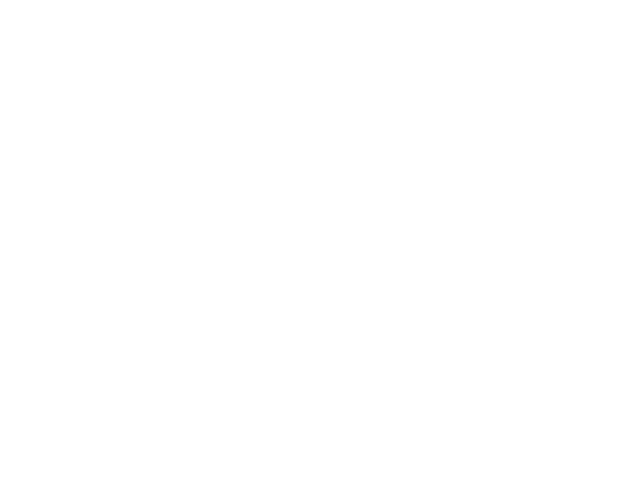

In [26]:
%matplotlib nbagg

train_EDA.groupby(['bi_zscore']).loss_zscore.sum().plot(kind='bar')
plt.ylabel('Crop Loss (Billions of $)', fontsize=16)


## All Loss by Commodity for Washington, 2001-2015

<IPython.core.display.Javascript object>


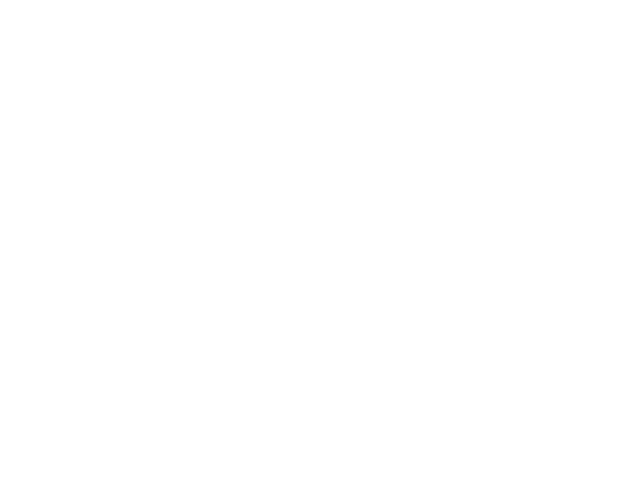

In [27]:
%matplotlib nbagg
train_EDA.groupby(['rmax_zscore']).loss_zscore.sum().plot(kind='bar')

## All Loss by County for Washington, 2001-2015

## Histogram of loss by County, Washington, 2001 - 2015.  Are there many small claims, a few large claims by county?

<IPython.core.display.Javascript object>


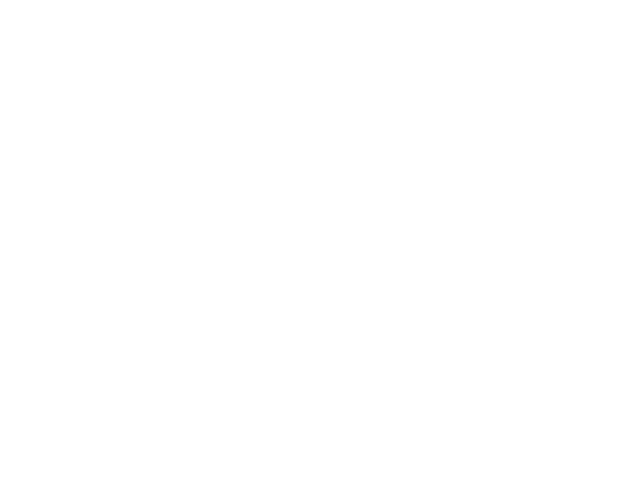

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa558fe03d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa54d3f2110>]], dtype=object)

In [28]:
%matplotlib nbagg
actual.hist(column='loss', by='countyfips', grid=False, bins=50)


## Box Plot of Wheat crop loss by month, Washington, 2001 - 2015 - by year - using log tranformed data

<IPython.core.display.Javascript object>


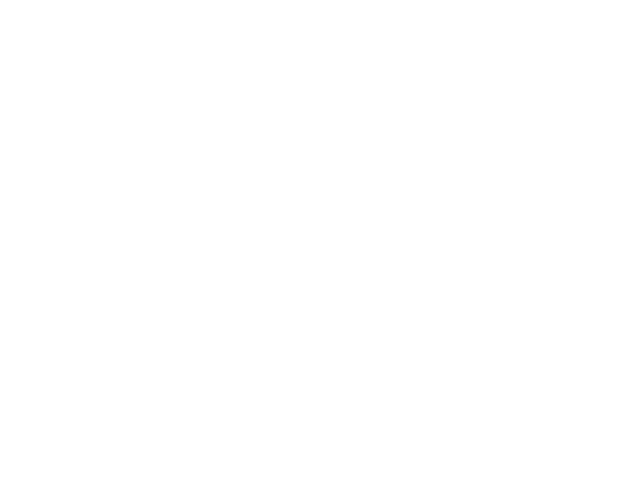

In [29]:
%matplotlib nbagg

from pylab import *
from scipy.io import loadmat

actual_log.boxplot(column='logloss', by='year', grid=False)
# labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
# xticks(range(1,13),labels, rotation=15)
xlabel('Year')
ylabel('Crop Loss ($)')
title('Washington State Wheat Crop Loss - 2001 - 2015, by Year')

## Box Plot of Wheat crop loss by damage cause, Washington, 2001 - 2015 - by year - using log tranformed data

<IPython.core.display.Javascript object>


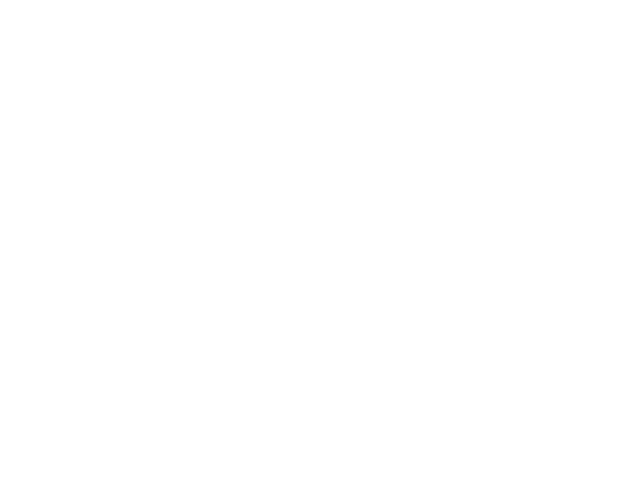

In [30]:
%matplotlib nbagg

from pylab import *
from scipy.io import loadmat

actual_log.boxplot(column='logloss', by='damagecausecode', grid=False)
# labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
#           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
# xticks(range(1,13),labels, rotation=15)
xlabel('Damage Cause')
ylabel('Crop Loss ($)')
title('Washington State Crop Loss - 2001 - 2015, by damage cause group')

<IPython.core.display.Javascript object>


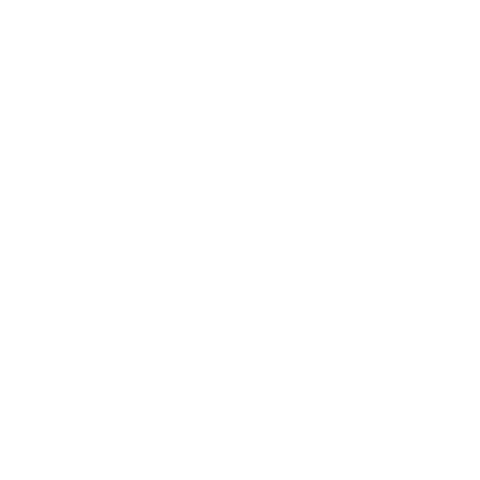

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa548b00f10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa53ab45810>]], dtype=object)

In [31]:
%matplotlib nbagg

from pandas.tools.plotting import scatter_matrix
scatter_matrix(actual, alpha=0.2, figsize=(6, 6), diagonal='hist')

<IPython.core.display.Javascript object>


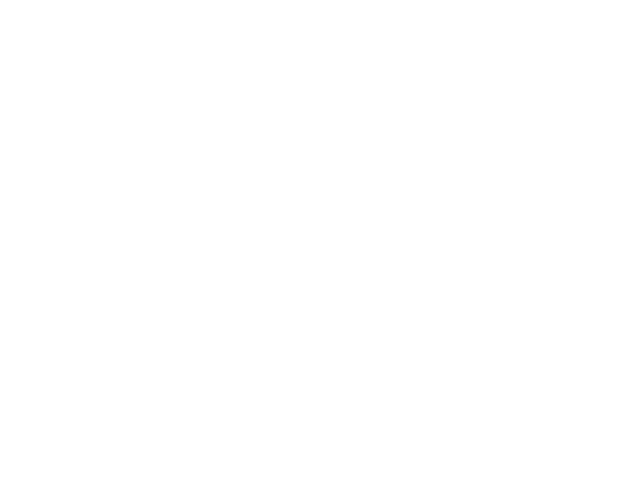

<IPython.core.display.Javascript object>


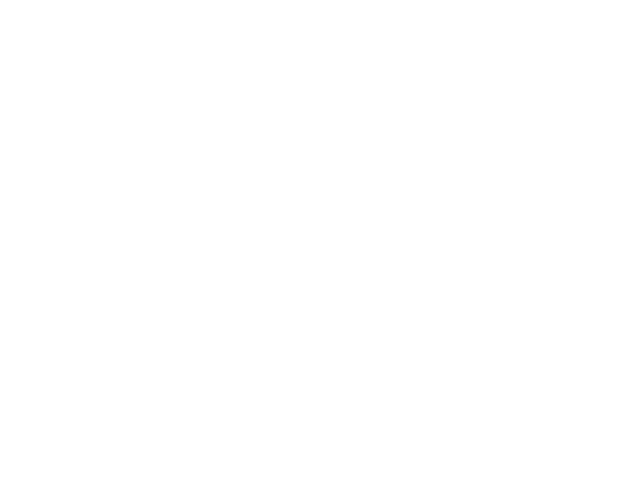

<IPython.core.display.Javascript object>


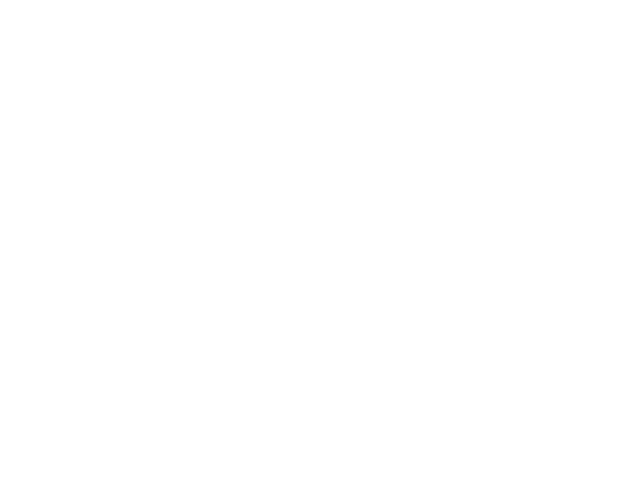

<IPython.core.display.Javascript object>


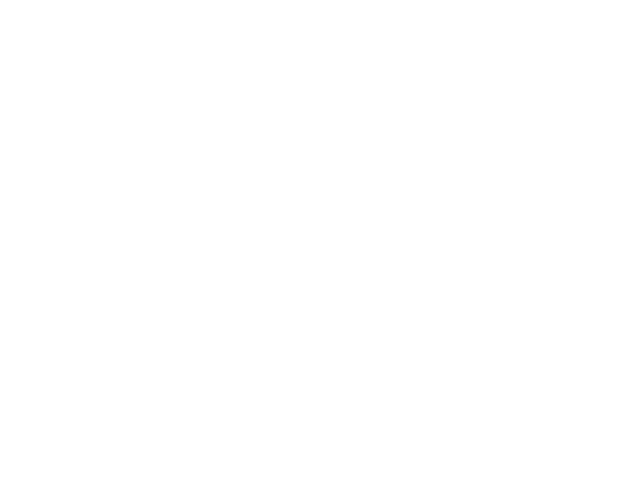

<IPython.core.display.Javascript object>


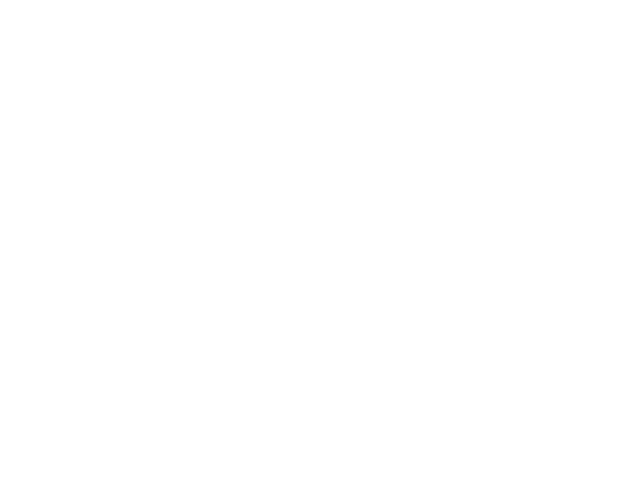

<IPython.core.display.Javascript object>


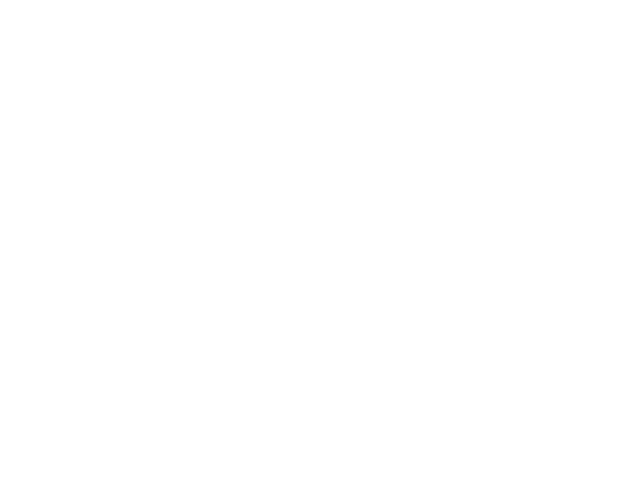

<IPython.core.display.Javascript object>


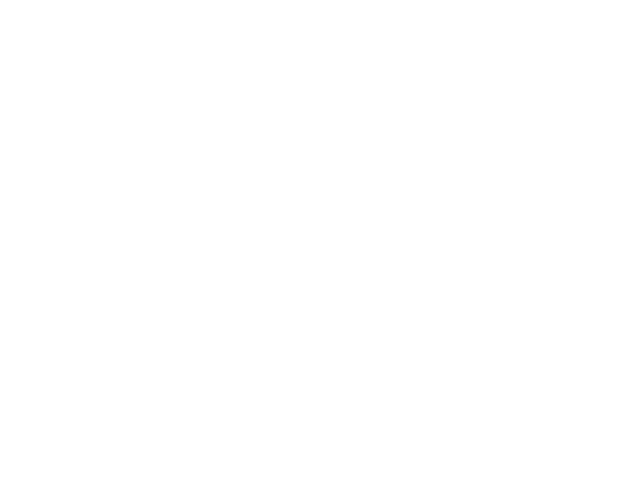

<IPython.core.display.Javascript object>


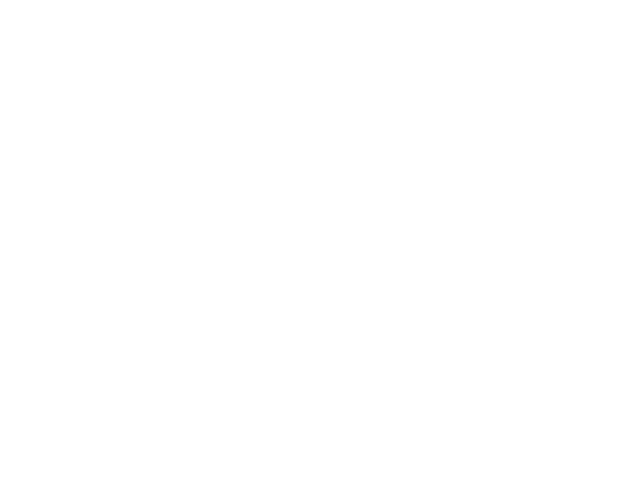

<IPython.core.display.Javascript object>


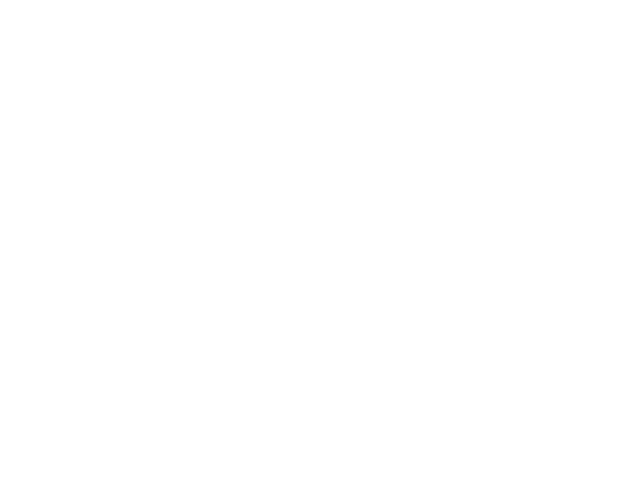

<IPython.core.display.Javascript object>


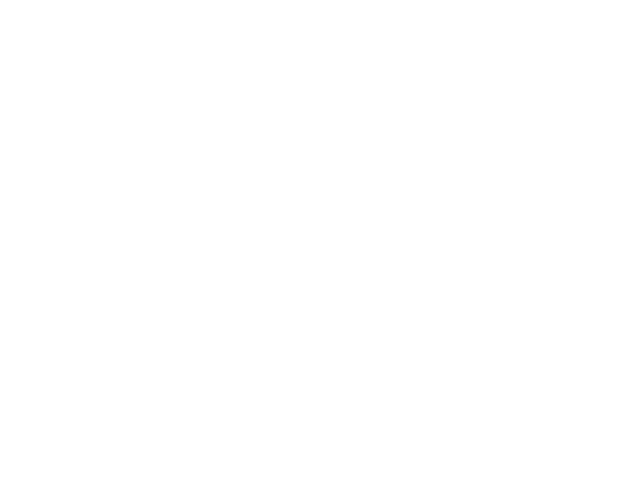

<IPython.core.display.Javascript object>


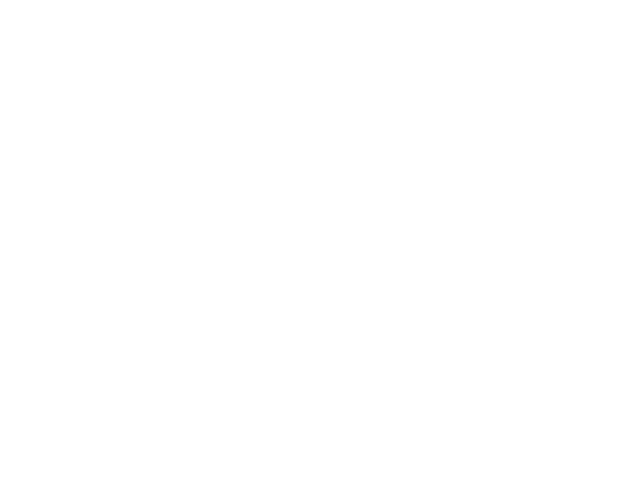

<IPython.core.display.Javascript object>


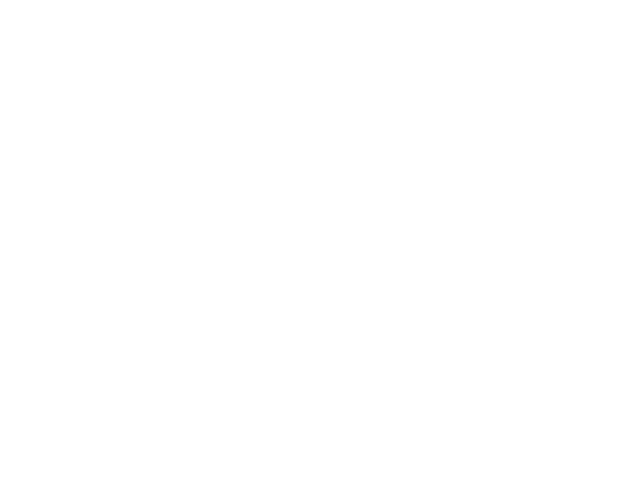

<IPython.core.display.Javascript object>


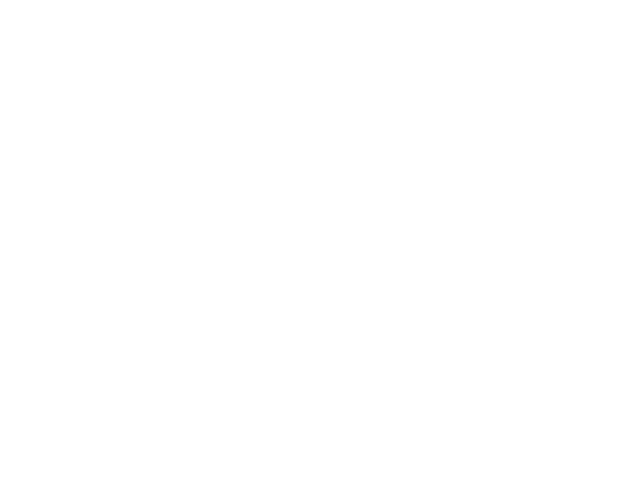

<IPython.core.display.Javascript object>


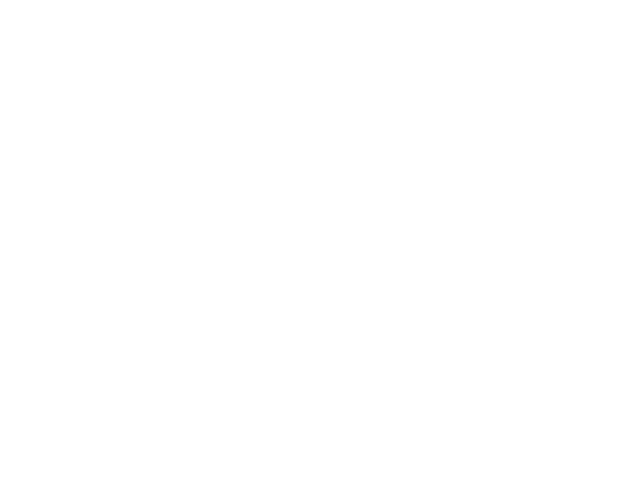

<IPython.core.display.Javascript object>


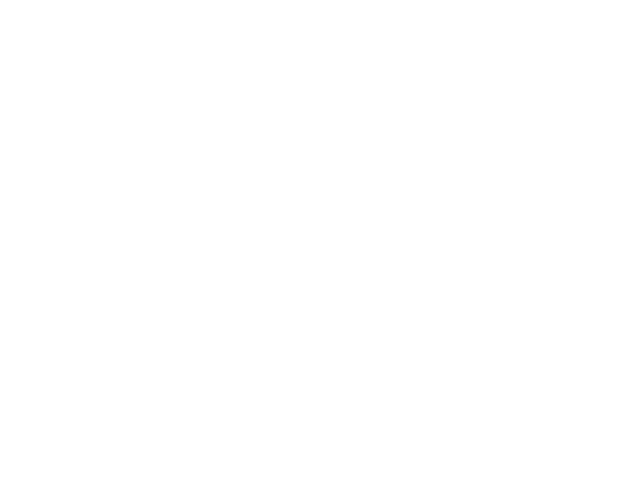

<IPython.core.display.Javascript object>


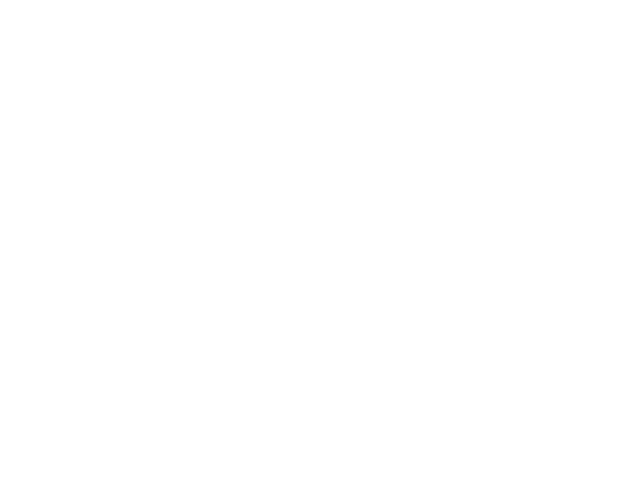

<IPython.core.display.Javascript object>


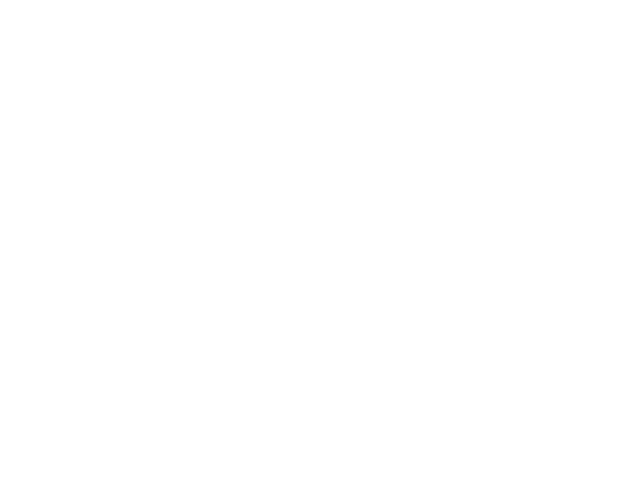

<IPython.core.display.Javascript object>


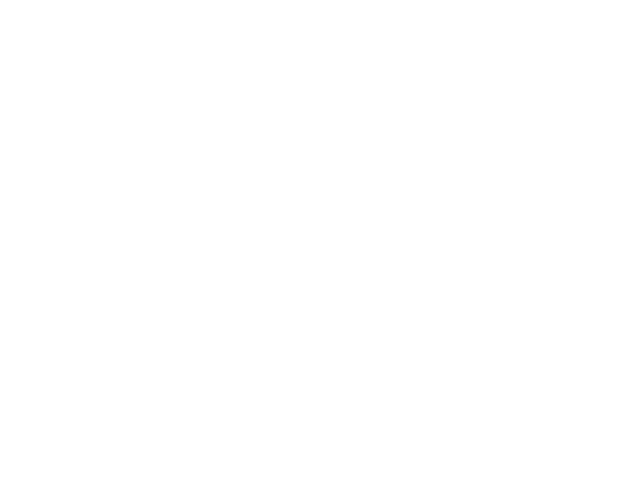

<IPython.core.display.Javascript object>


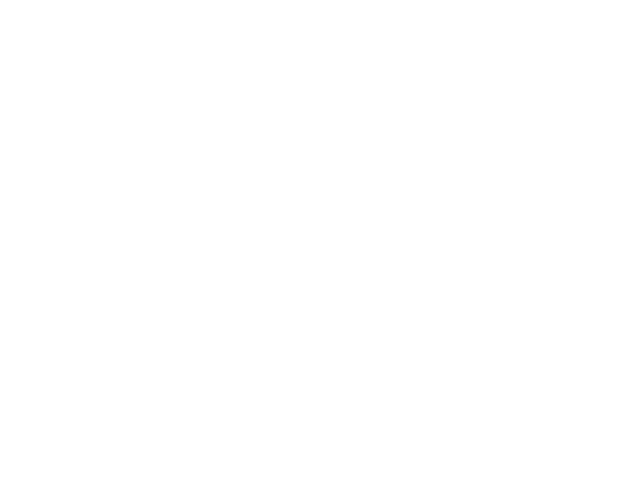

<IPython.core.display.Javascript object>


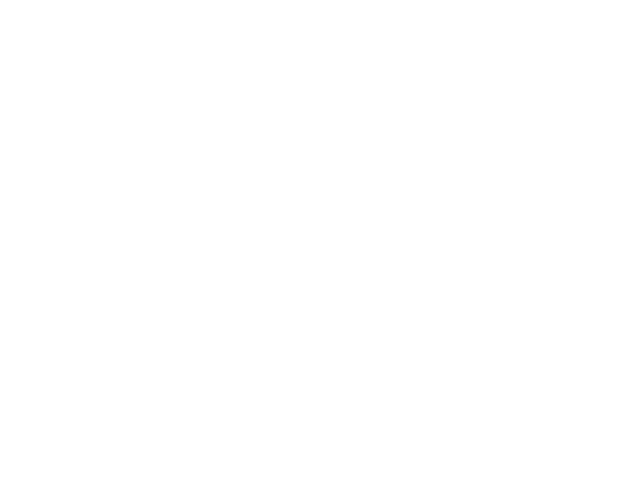

/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


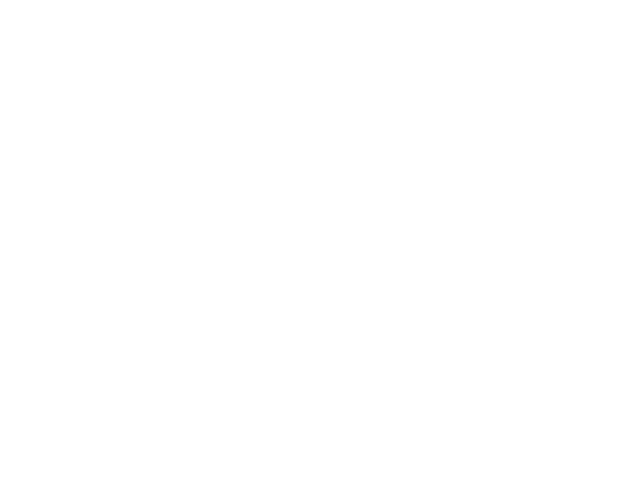

<IPython.core.display.Javascript object>


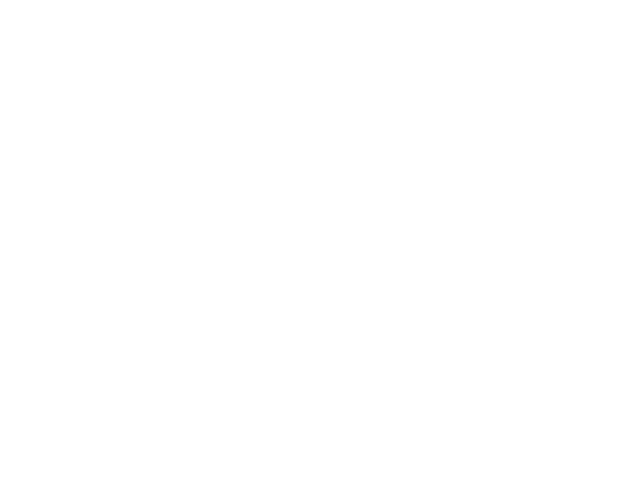

<IPython.core.display.Javascript object>


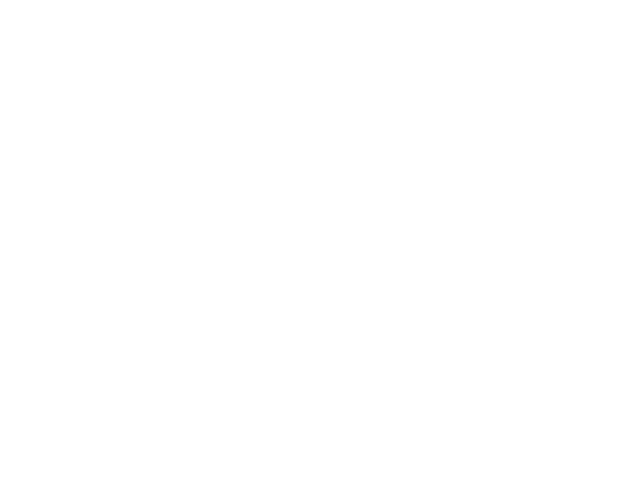

<IPython.core.display.Javascript object>


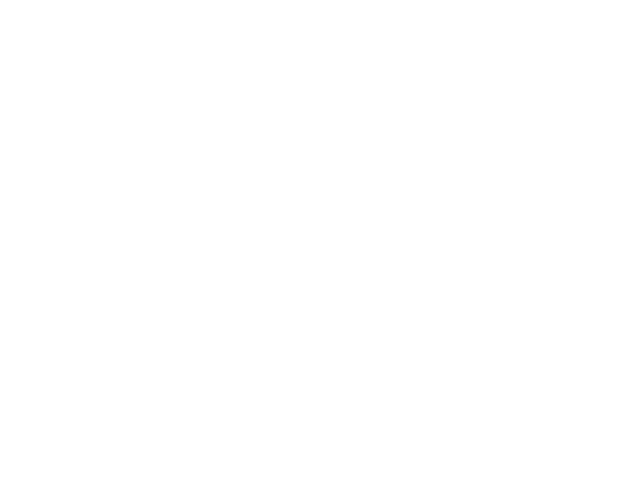

<IPython.core.display.Javascript object>


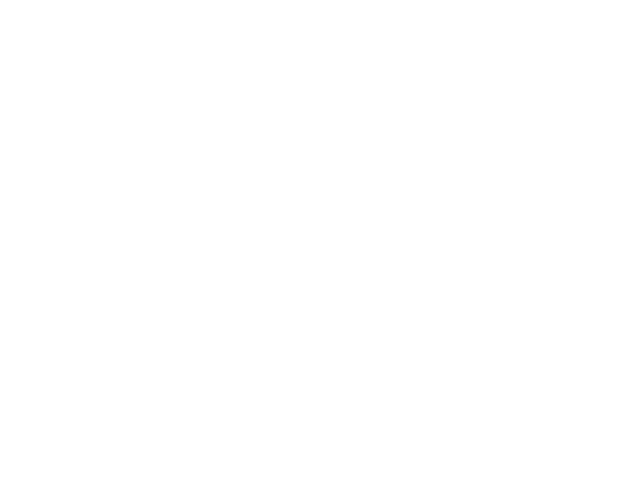

<IPython.core.display.Javascript object>


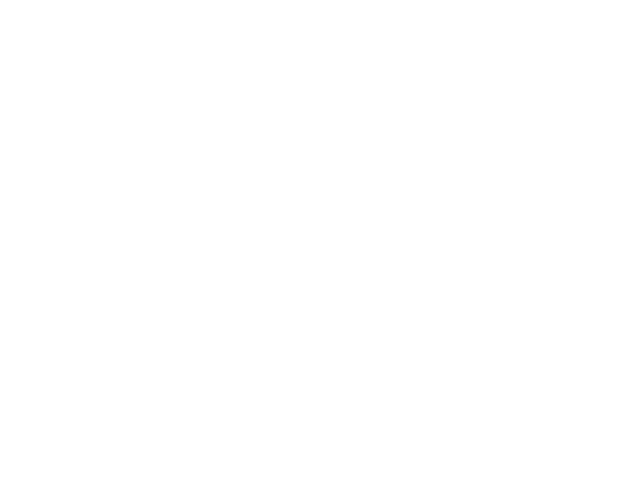

<IPython.core.display.Javascript object>


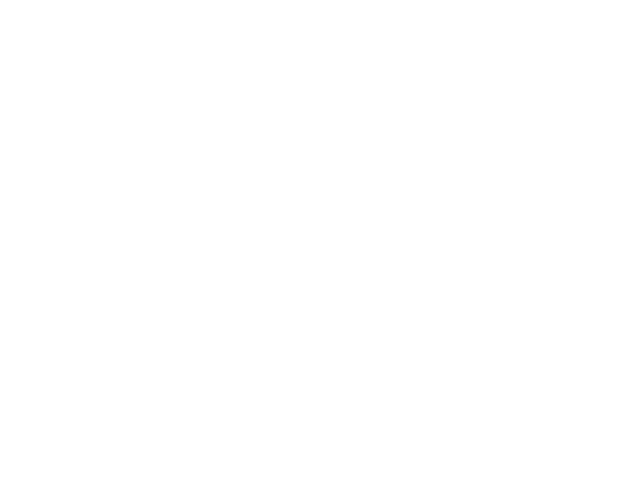

<IPython.core.display.Javascript object>


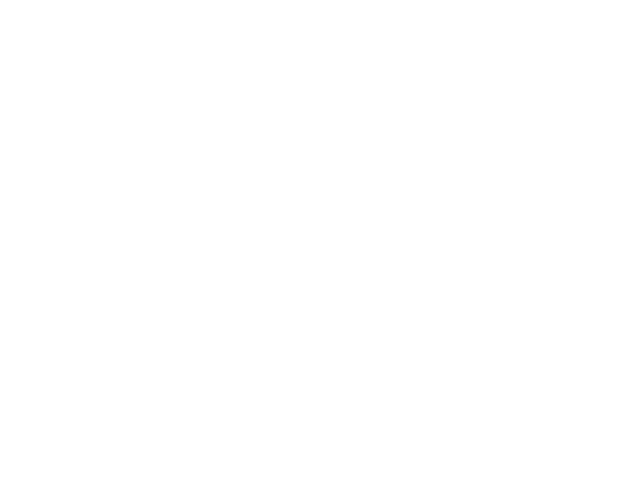

damagecausecode
01                                     Axes(0.125,0.1;0.775x0.8)
1                                      Axes(0.125,0.1;0.775x0.8)
11                                     Axes(0.125,0.1;0.775x0.8)
12                                     Axes(0.125,0.1;0.775x0.8)
13                                     Axes(0.125,0.1;0.775x0.8)
14                                     Axes(0.125,0.1;0.775x0.8)
15                                     Axes(0.125,0.1;0.775x0.8)
21                                     Axes(0.125,0.1;0.775x0.8)
22                                     Axes(0.125,0.1;0.775x0.8)
31                                     Axes(0.125,0.1;0.775x0.8)
41                                     Axes(0.125,0.1;0.775x0.8)
42                                     Axes(0.125,0.1;0.775x0.8)
43                                     Axes(0.125,0.1;0.775x0.8)
44                                     Axes(0.125,0.1;0.775x0.8)
51                                     Axes(0.125,0.1;0.775x0.8)
55       

In [32]:
%matplotlib nbagg

damage_cause = np.unique(actual[['damagecausecode']])

t = actual.groupby(['damagecausecode'])
t.plot(kind='scatter', x='pdsi', y='loss', title='test')


In [32]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

df = Xm_standard
axes = pd.tools.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()
plt.savefig('scatter_matrix.png')

KeyboardInterrupt: 

KeyboardInterrupt: 

## Setup Training and Testing
### Xm_standard - X vector, normalized
### y_zscore - y vector, normalized

In [ ]:
Xm_standard = Xm_standard.drop('acres_zscore', 1)
Xpre_standard = Xpre_standard.drop('acres_zscore', 1)

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpre_standard, y_zscore)

## Actual observations, Washington, 2001 - 2015, with no z score standardization

In [34]:
actual.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 530


,bi,pr,pdsi,pet,erc,th,vs,fm1000,fm100,srad,...,rmax,acres,countyfips,year,monthcode,damagecausecode,insuranceplancode,commoditycode,stagecode,loss
0,18.56168,1.012276,-0.921773,3.066433,27.887755,188.6618,3.389354,17.820571,14.732982,212.09584,...,89.88237,48.300,53001,2001,4,41,86,54,UH,110761.0
1,18.56168,1.012276,-0.921773,3.066433,27.887755,188.6618,3.389354,17.820571,14.732982,212.09584,...,89.88237,83.000,53001,2001,4,41,86,54,H,83266.0
2,18.56168,1.012276,-0.921773,3.066433,27.887755,188.6618,3.389354,17.820571,14.732982,212.09584,...,89.88237,66.900,53001,2001,4,41,90,11,H,2203.2
3,18.56168,1.012276,-0.921773,3.066433,27.887755,188.6618,3.389354,17.820571,14.732982,212.09584,...,89.88237,4.836,53001,2001,4,44,44,11,H,397.2
4,18.56168,1.012276,-0.921773,3.066433,27.887755,188.6618,3.389354,17.820571,14.732982,212.09584,...,89.88237,12.290,53001,2001,4,41,90,91,H,261.0


## Observations, Washingtion, 2001 - 2015, with all climate data converted to z-scores

In [35]:
Xm_standard.columns

Index([                          u'bi_zscore',
                                 u'pr_zscore',
                               u'pdsi_zscore',
                                u'pet_zscore',
                                u'erc_zscore',
                                 u'th_zscore',
                                 u'vs_zscore',
                             u'fm1000_zscore',
                              u'fm100_zscore',
                               u'srad_zscore',
                                u'sph_zscore',
                               u'tmmx_zscore',
                               u'tmmn_zscore',
                               u'rmin_zscore',
                               u'rmax_zscore',
                              u'acres_zscore',
                                       u'jan',
                                       u'feb',
                                       u'mar',
                                       u'apr',
                                       u'may',
             

In [61]:
Xpre_standard.head()

,bi_zscore,pr_zscore,pdsi_zscore,pet_zscore,erc_zscore,th_zscore,vs_zscore,fm1000_zscore,fm100_zscore,srad_zscore,sph_zscore,tmmx_zscore,tmmn_zscore,rmin_zscore,rmax_zscore,acres_zscore
0,-0.687014,-0.082184,0.010197,-0.374796,-0.55915,0.145154,-0.181795,0.411977,0.297354,-0.115993,-0.591346,-0.351239,-0.547006,-0.127007,0.912082,-0.189732
1,-0.687014,-0.082184,0.010197,-0.374796,-0.55915,0.145154,-0.181795,0.411977,0.297354,-0.115993,-0.591346,-0.351239,-0.547006,-0.127007,0.912082,-0.179409
2,-0.687014,-0.082184,0.010197,-0.374796,-0.55915,0.145154,-0.181795,0.411977,0.297354,-0.115993,-0.591346,-0.351239,-0.547006,-0.127007,0.912082,-0.184199
3,-0.687014,-0.082184,0.010197,-0.374796,-0.55915,0.145154,-0.181795,0.411977,0.297354,-0.115993,-0.591346,-0.351239,-0.547006,-0.127007,0.912082,-0.202661
4,-0.687014,-0.082184,0.010197,-0.374796,-0.55915,0.145154,-0.181795,0.411977,0.297354,-0.115993,-0.591346,-0.351239,-0.547006,-0.127007,0.912082,-0.200444


In [ ]:
y_zscore

# Machine Learning Analysis

### Remove acreage as a feature variable.  

In [ ]:
X = Xm_standard
y = y_zscore

## Building a regression decision tree in scikit-learn

In [36]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

In [37]:
# use 10 fold CV to estimate the RMSE for this model
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(treereg, Xpre_standard, y_zscore, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.85367194192929485

## Tuning regression tree

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [62]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
scores = cross_val_score(treereg, Xm_standard, y, cv=10, scoring='mean_squared_error')
np.mean(np.sqrt(-scores))

0.65388246281225715

## Looping thru a set number of max_depths to see the optimum level

In [ ]:
# list of values to try
max_depth_range = range(1, 50)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, Xm_standard, y_zscore, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

<IPython.core.display.Javascript object>


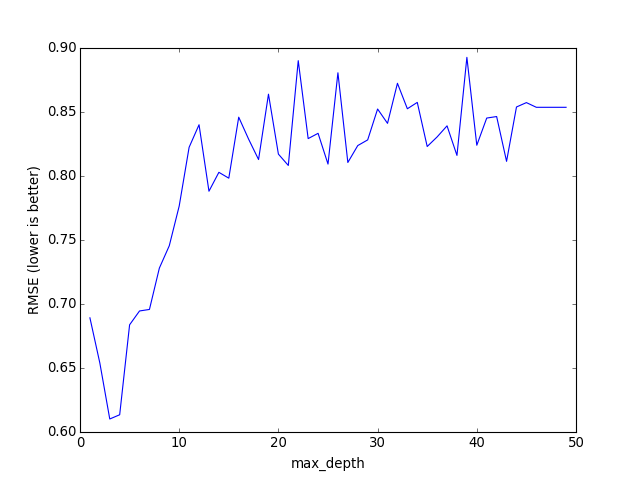

In [40]:
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

#### NRMSE = RMSE/(max(DV)-min(DV)) 

In [53]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(Xpre_standard, y_zscore)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=1, splitter='best')

## Decision Tree Feature Importance determination

In [54]:
cols = Xpre_standard.columns

In [55]:
cols

Index([u'bi_zscore', u'pr_zscore', u'pdsi_zscore', u'pet_zscore',
       u'erc_zscore', u'th_zscore', u'vs_zscore', u'fm1000_zscore',
       u'fm100_zscore', u'srad_zscore', u'sph_zscore', u'tmmx_zscore',
       u'tmmn_zscore', u'rmin_zscore', u'rmax_zscore', u'acres_zscore'],
      dtype='object')

In [56]:
pd.set_option('display.max_rows', 640)
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
importance = pd.DataFrame({'feature':cols, 'importance':treereg.feature_importances_})


In [57]:
importance

,feature,importance
0,bi_zscore,0.003349
1,pr_zscore,0.001612
2,pdsi_zscore,0.011846
3,pet_zscore,0.000060
4,erc_zscore,0.000321
5,th_zscore,0.003066
6,vs_zscore,0.005218
7,fm1000_zscore,0.000546
8,fm100_zscore,0.000000
9,srad_zscore,0.006315


In examining the above feature importance table, these variables appear to be the most significant with regards to crop loss:

- pdsi - Palmer Drought Suitability Index
- srad - Solar radiation
- decline in price - a dummy variable of damage cause.  Decline in Price is a type of damage that a farmer would declare as the reason for his insurance claim.  

    
    

In [ ]:
sig_feature_cols = ['pdsi_zscore', 'decline in price', 'srad']
X_sig = train[feature_cols]


## Creating a tree diagram

In [58]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='/home/git/dmine/circ/tree_ag.dot', feature_names=cols)
#export_graphviz(treereg, out_file='tree_ag.dot')

#print fileconvert
# At the command line, run this to convert to PNG:
#dot -Tpng tree_ag.dot -o tree_ag.png

In [59]:
%system("dot -Tpng /home/git/dmine/circ/tree_ag.dot -o /home/git/dmine/circ/tree_ag_wheat.png")

['/bin/sh: dot -Tpng /home/git/dmine/circ/tree_ag.dot -o /home/git/dmine/circ/tree_ag_wheat.png: No such file or directory']

In [ ]:

graph.draw('tree_ag_wheat.png')

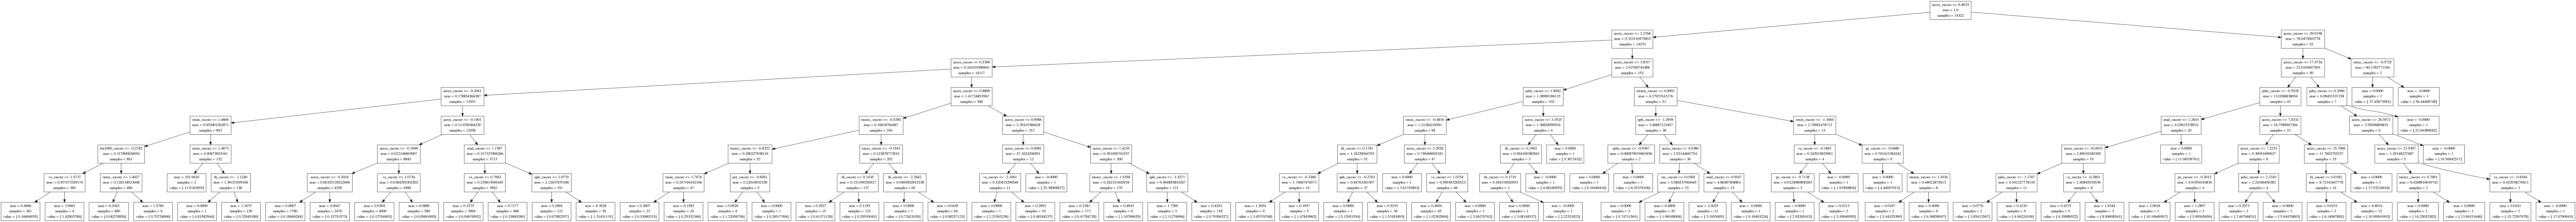

In [60]:
from IPython.display import Image
Image(filename='/home/git/dmine/circ/tree_ag_wheat.png')

## Making predictions for the testing data

**Question:** Using the tree diagram above, what predictions will the model make for each observation?

In [ ]:
y_pred = treereg.predict(X_test)
y_pred

In [ ]:
from sklearn import metrics
# calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [ ]:
# calculate RMSE for your own tree!
#y_test = []
#y_pred = []
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

## Random Forest

In [ ]:
rf_range = range(1, 50)
rf_scores = []
for k in rf_range:
    rfreg = RandomForestRegressor(n_estimators=k, random_state=42)
    rfa_fit = rfreg.fit(Xpre_standard,y_zscore)
    rfa_scores = rfa_fit.score(X_test, y_test)
    rf_scores.append(rfa_scores.mean())

In [ ]:
import matplotlib
%matplotlib nbagg
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(rf_range, rf_scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')

## Optimized Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfor = RandomForestRegressor(max_depth = 15)
rforfit = rfor.fit(Xpre_standard,y_zscore)
result14 = rforfit.score(X_test,y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result14, 4)
print "The time it takes to run is:"


In [ ]:
rfor_range = range(1, 50)
rfor_scores = []

for k in rfor_range:
    rfreg = RandomForestRegressor(n_estimators=k, random_state=42)
    rfa_fit = rfreg.fit(Xpre_standard,y_zscore)
    rfa_scores = rfa_fit.score(X_test, y_test)
    rfor_scores.append(rfa_scores.mean())

In [ ]:
import matplotlib
%matplotlib nbagg
# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(rfor_range, rfor_scores)
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')

### Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV
np.mean(cross_val_score(RidgeCV(), Xpre_standard, y_zscore, scoring='mean_squared_error'))

## Find Optimal K in KNN

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
x = range(1, 25)
knnoptim = []
for k in x:
    knno = KNeighborsRegressor(n_neighbors = k)
    kfit = knno.fit(Xpre_standard,y_zscore)
    scores = kfit.score(X_test, y_test)
    knnoptim.append(scores)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, knnoptim, color = 'orange', linewidth = 2)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

### K Nearest Neighbors rerun with N = 10, as determined from above accuracy testing

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knnfit = knn.fit(Xpre_standard,y_zscore)
result =  knnfit.score(X_test, y_test)
print "The accuracy score selected with logistic regression is:"
print round(result, 4)
print "The time it took to run is:"

### Find optimal max depth for Regression Decision tree

Here we iterate thru a set of ranges for maximum depth of a decision tree, to see what is the optimum depth

In [ ]:
from sklearn.tree import DecisionTreeRegressor
deep = range(1, 100)
treeoptim = []
for i in deep:
    treee = DecisionTreeRegressor(random_state = 22, max_depth = i)
    treefit = treee.fit(Xpre_standard,y_zscore)
    treescore = treefit.score(X_test, y_test)
    treeoptim.append(treescore)

In [ ]:
plt.plot(deep, treeoptim, color = 'coral', linewidth = 2)
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')

### Optimized Regression Decision Tree

Here we run a regression decision tree with a max depth of 20, as indicated from above accuracy testing

In [ ]:
treee = DecisionTreeRegressor(random_state = 1, max_depth = 3)
treefit = treee.fit(Xpre_standard,y_zscore)
treescore = treefit.score(X_test, y_test)
print "The accuracy score for variables selected using a Regression Decision Tree is:"
treescore

## Ensemble methods - Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(max_samples = 640, random_state = 22)
bagfit = bag.fit(Xpre_standard, y_zscore)
result12 = bagfit.score(X_test, y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result12, 4)
print "The time it takes to run is:"

## Extremely Randomized Trees

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor(random_state = 40, min_samples_split=1, bootstrap = True, max_depth = 3)
etreefit = etree.fit(Xpre_standard,y_zscore)
result16 = etreefit.score(X_test, y_test)
print "The AUC for the variables selected with logistic regression is:"
print round(result16, 4)
print "The time it takes to run is:"